# Binary Classification with a Bank Dataset 

<img src="https://www.egeolay.com/images/haberler/2022/10/2022-mevduat-faiz-orani-ortalamasi-eylulde-16-94-oldu.png" width="600">

**In this project,** the goal is to predict whether a client will subscribe to a term deposit. The dataset is from a **Kaggle Playground Series** competition (Season 5, Episode 8), and the task is a **binary classification problem** where the target variable is `y`.

The dataset for this competition was generated from a deep learning model trained on the original Bank Marketing Dataset. Feature distributions are close to, but not exactly the same as, the original.

## Features Description

* `id`: Unique identifier for each observation.
* `age`: Age of the client (numeric).
* `job`: Type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown').
* `marital`: Marital status (categorical: 'divorced', 'married', 'single', 'unknown').
* `education`: Level of education (categorical: 'primary', 'secondary', 'tertiary', 'unknown').
* `default`: Has credit in default? (categorical: 'no', 'yes', 'unknown').
* `balance`: Average yearly balance, in euros (numeric).
* `housing`: Has housing loan? (categorical: 'no', 'yes', 'unknown').
* `loan`: Has personal loan? (categorical: 'no', 'yes', 'unknown').
* `contact`: Contact communication type (categorical: 'cellular', 'telephone', 'unknown').
* `day`: Last contact day of the month (numeric).
* `month`: Last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec').
* `duration`: Last contact duration, in seconds (numeric). This feature highly affects the output target (e.g., if duration=0 then y='no').
* `campaign`: Number of contacts performed during this campaign and for this client (numeric).
* `pdays`: Number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted).
* `previous`: Number of contacts performed before this campaign and for this client (numeric).
* `poutcome`: Outcome of the previous marketing campaign (categorical: 'failure', 'other', 'success', 'unknown').

The dataset was taken from Kaggle:

[Kaggle | Binary Classification with a Bank Dataset](https://www.kaggle.com/competitions/playground-series-s5e8/overview)

## Data Read

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

## EDA - Expoloratory Data Analysis

In [3]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [4]:
train.tail()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0
749999,749999,42,technician,married,secondary,no,1559,no,no,cellular,4,aug,143,1,1,7,failure,0


In [5]:
train.sample(3)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
634816,634816,46,blue-collar,married,primary,no,13,no,no,cellular,22,aug,103,4,-1,0,unknown,0
13306,13306,32,housemaid,married,secondary,no,2,yes,no,cellular,7,jul,88,2,-1,0,unknown,0
215928,215928,49,services,married,secondary,no,471,no,no,cellular,13,aug,918,5,-1,0,unknown,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [7]:
train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
train['job'].value_counts()

job
management       175541
blue-collar      170498
technician       138107
admin.            81492
services          64209
retired           35185
self-employed     19020
entrepreneur      17718
unemployed        17634
housemaid         15912
student           11767
unknown            2917
Name: count, dtype: int64

In [9]:
train['marital'].value_counts()

marital
married     480759
single      194834
divorced     74407
Name: count, dtype: int64

In [10]:
train['education'].value_counts()

education
secondary    401683
tertiary     227508
primary       99510
unknown       21299
Name: count, dtype: int64

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

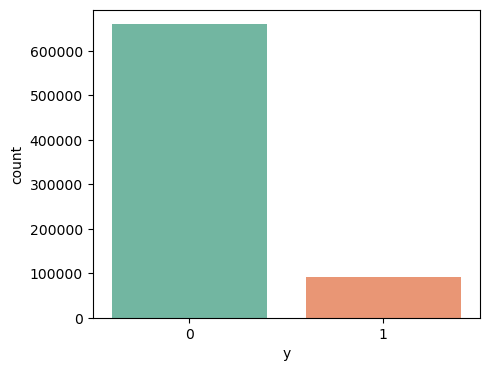

In [12]:
plt.figure(figsize=(5,4))
sns.countplot(x='y', data=train, palette="Set2");

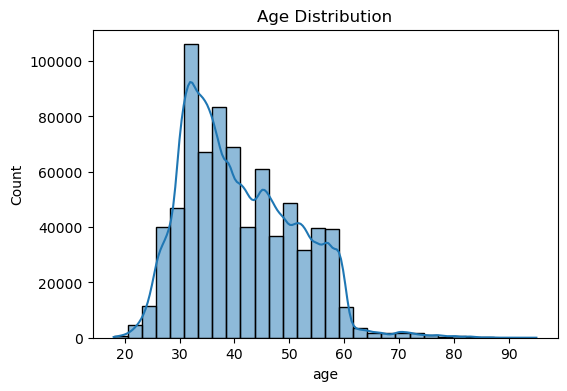

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(train['age'], bins=30, kde=True)
plt.title("Age Distribution");

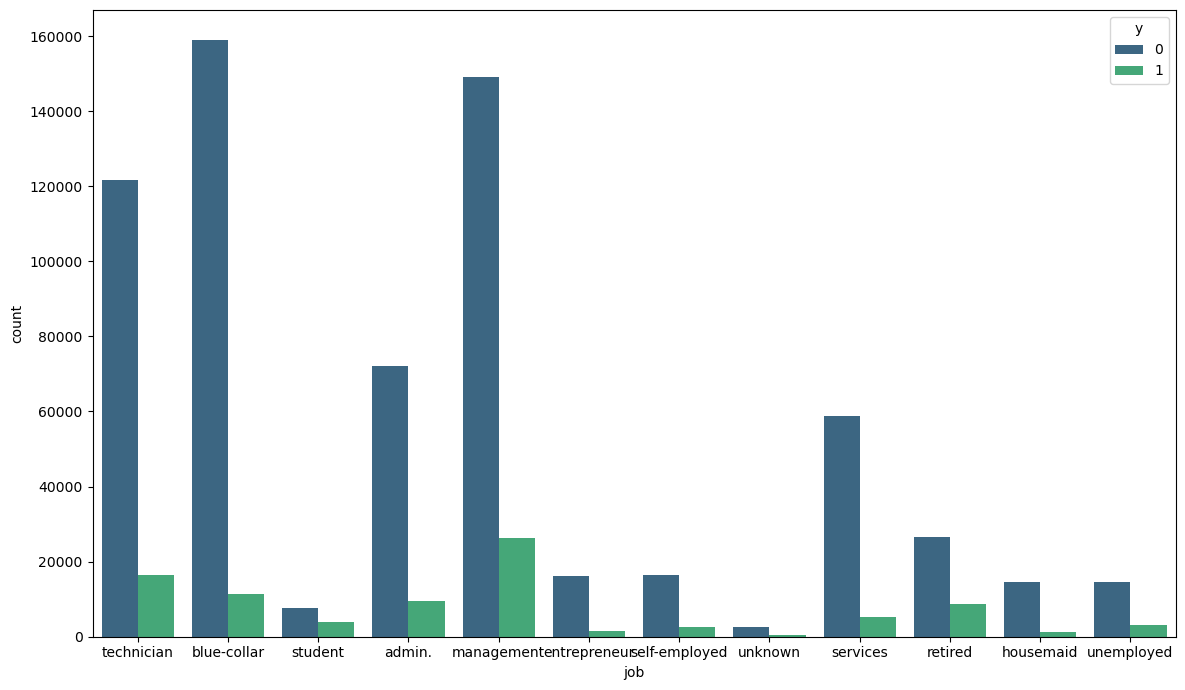

In [14]:
plt.figure(figsize=(12, 7))
sns.countplot(x='job', hue='y', data=train, palette='viridis')
plt.tight_layout() 

<Axes: xlabel='y', ylabel='duration'>

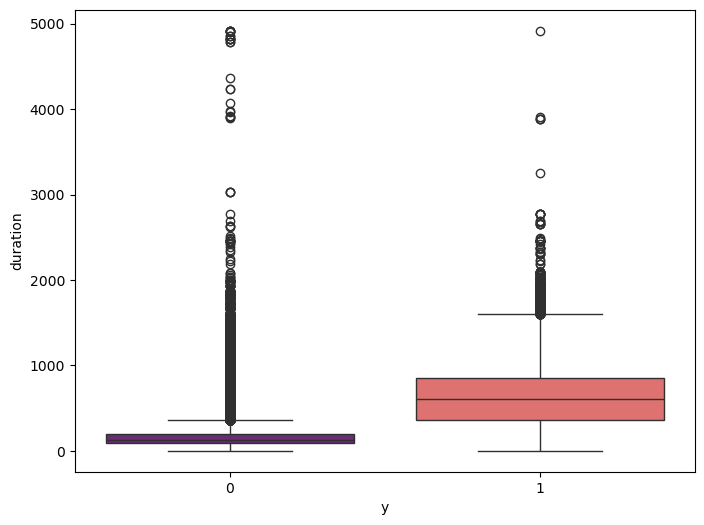

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='duration', data=train, palette='magma')

<Axes: >

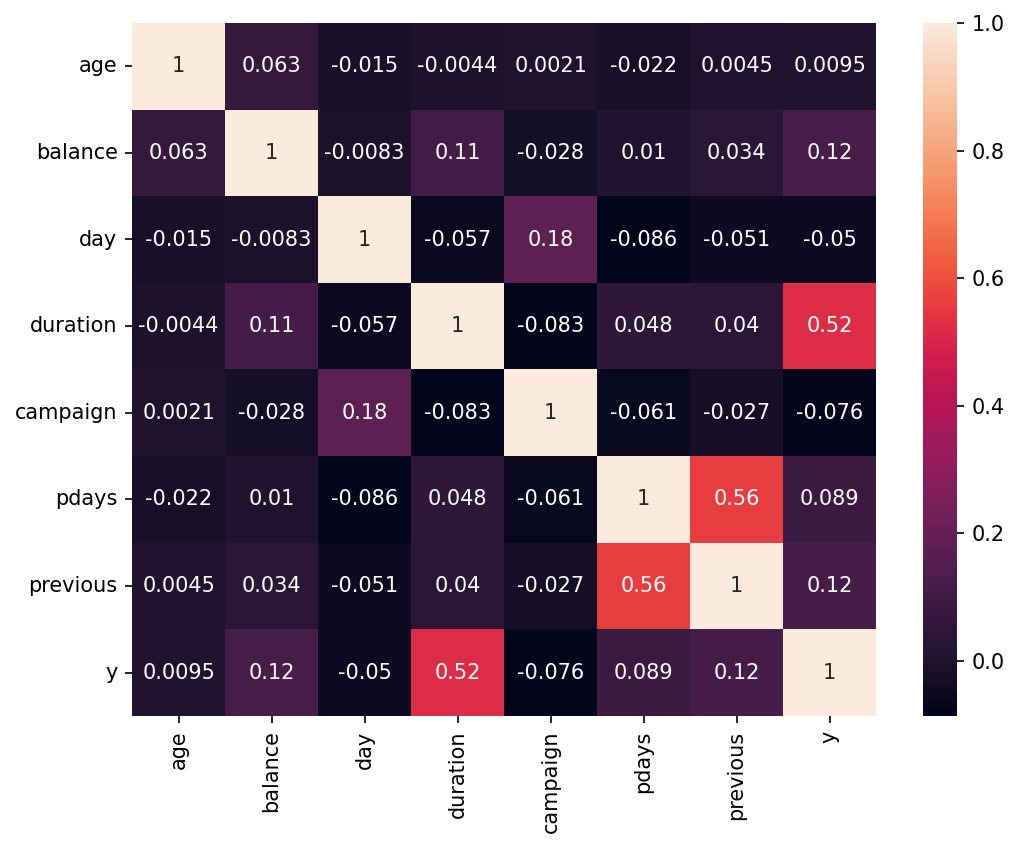

In [16]:
plt.figure(figsize=(8,6), dpi=150)
sns.heatmap(train.drop(columns=['id']).corr(numeric_only=True), annot=True)

## Data Preprocessing

In [17]:
x = train.drop(columns=['id','y'])
y = train['y']

In [18]:
x = pd.get_dummies(x,drop_first=True)

In [19]:
x.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,42,7,25,117,3,-1,0,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,38,514,18,185,1,-1,0,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
2,36,602,14,111,2,-1,0,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,27,34,28,10,2,-1,0,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,26,889,3,902,1,-1,0,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True


## Modelling 

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test, y_train,y_test=train_test_split(x, y, test_size=.20, random_state=42)

In [24]:
r = RandomForestClassifier()

In [25]:
r.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
tahmin = r.predict(x_test)

In [27]:
accuracy_score(y_test, tahmin)

0.9315466666666666

In [28]:
precision_score(y_test, tahmin)

0.7556529021452039

In [29]:
recall_score(y_test, tahmin, average="micro")

0.9315466666666666

In [30]:
f1_score(y_test, tahmin)

0.6955645161290323

In [31]:
confusion_matrix(y_test, tahmin)

array([[128002,   3793],
       [  6475,  11730]], dtype=int64)

## Predict Test Data 

In [33]:
test_id = test['id']

In [34]:
test_pred = test.drop(columns=['id'])

In [35]:
test_pred = pd.get_dummies(test_pred, drop_first=True)

In [36]:
# probabilities = pro
pro = r.predict(test_pred)

In [37]:
pro

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

## Submission 

In [39]:
submission = pd.DataFrame({'id': test_id, 'y': pro})

In [41]:
submission.to_csv('submission.csv', index=False)
print("Submission Saved!")

Submission Saved!


##  Conclusion

<img src="score.png" width="600">

In this project, a `RandomForestClassifier` model was developed to predict whether clients would subscribe to a bank term deposit.

The model demonstrated strong results on the validation set, achieving **93.15% accuracy** and an **F1-Score of 0.70**. After submitting predictions on the official competition test data to Kaggle, a final **Private Score of 0.80826** was achieved.

This result confirms that the `RandomForestClassifier` model was successful and effective in predicting customer behavior. For future work, the score could be further improved through hyperparameter tuning and by experimenting with different algorithms, such as `XGBoost`.

In [43]:
## Model Saved
import joblib

joblib.dump(r, 'random_forest_model.joblib')

model_columns = x_train.columns
joblib.dump(model_columns, 'model_columns.joblib')

print("Succesful !")

Succesful !
